# Plotting Scheduling Latency Data for SOSP

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
import pprint
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

### Define methods

In [59]:
def load_scheduling_data(source_dir = '../meta/sched_latency/', read_labels=True, num_node_range = [1, 5, 10], num_res_range = [10, 100, 1000], num_task_range=[1, 10, 100, 1000, 10000]):
    data = {}
    for nodes in num_node_range:
        for res in num_res_range:
            for task in num_task_range:
                data[str(nodes) + '_' + str(res) + '_' + str(task)] = np.loadtxt(os.path.join(source_dir, "n{}_r{}_t{}.txt".format(nodes, res, task)))
    # Read labels:
    if read_labels:
        label_file_path = os.path.join(source_dir, "label.txt")
        with open(label_file_path, 'r') as f:
            labels = f.readline().split(",")
    return data, labels

def get_stats(data):
    mean_data = {}
    stddev_data = {}
    median_data = {}
    for k,v in data.items():
        mean_data[k] = np.mean(v, axis=0)
        stddev_data[k] = np.std(v, axis=0)
        median_data[k] = np.median(v, axis=0) 
    return mean_data, stddev_data, median_data


### Plotting methods

In [78]:
def plot_schedlatency_bars(mean_data, stddev_data, num_res_range, num_node, num_task, data_idx = 1):
    x_pos = np.arange(len(num_res_range))
    means = [mean_data["{}_{}_{}".format(num_node, num_res, num_task)][data_idx] for num_res in num_res_range]
    errors = [stddev_data["{}_{}_{}".format(num_node, num_res, num_task)][data_idx] for num_res in num_res_range]

    plt.bar(x_pos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.5)
    plt.ylabel('Seconds')
    plt.xlabel('Number of resources in the cluster')
    plt.xticks(x_pos, [str(i) for i in num_res_range])
    plt.title('Total scheduling latency for {} tasks across {} nodes'.format(num_task, num_node))

## Analysis


### Plot single node data

In [72]:
path = '../meta/sched_latency/'
num_node_range=[1, 10]
num_res_range=[10, 50, 100, 500, 1000]
num_task_range=[1, 10000]
data, labels = load_scheduling_data(path, num_node_range=num_node_range, num_res_range=num_res_range, num_task_range=num_task_range)

In [73]:
mean_data, stddev_data, median_data = get_stats(data)
pprint.pprint(mean_data)

{'10_1000_1': array([0.00023847, 0.00566101]),
 '10_1000_10000': array([2.5018187, 4.4174924]),
 '10_100_1': array([0.00033112, 0.00484681]),
 '10_100_10000': array([3.29548922, 4.24246206]),
 '10_10_1': array([0.0003459 , 0.00514131]),
 '10_10_10000': array([3.55771093, 4.51061425]),
 '10_500_1': array([0.00028296, 0.00913186]),
 '10_500_10000': array([3.18717604, 4.18413892]),
 '10_50_1': array([0.00036335, 0.00441866]),
 '10_50_10000': array([3.21929836, 4.23002043]),
 '1_1000_1': array([0.00021076, 0.00269623]),
 '1_1000_10000': array([2.62769046, 2.93363566]),
 '1_100_1': array([0.00044246, 0.00384245]),
 '1_100_10000': array([2.5065495 , 2.84698849]),
 '1_10_1': array([0.00044312, 0.00378695]),
 '1_10_10000': array([2.74337502, 3.04429932]),
 '1_500_1': array([0.00027499, 0.00260682]),
 '1_500_10000': array([2.2885066 , 2.67381396]),
 '1_50_1': array([0.00040007, 0.00360932]),
 '1_50_10000': array([2.64088678, 2.94168043])}


### Fixed num of nodes, variable resources

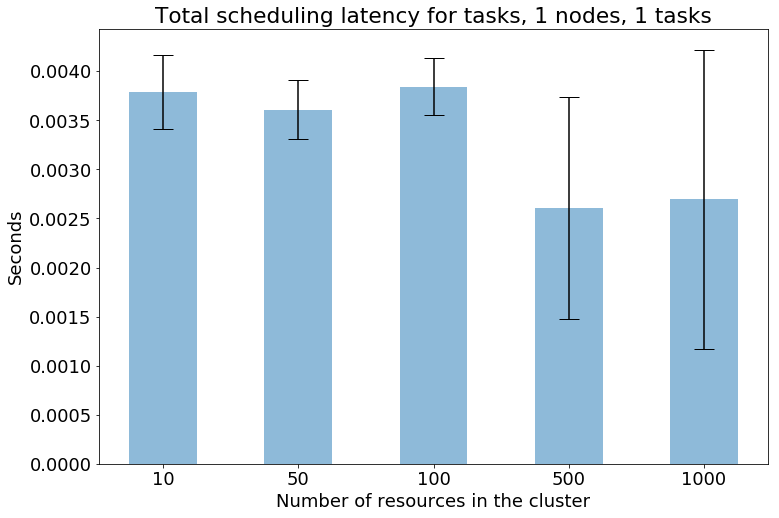

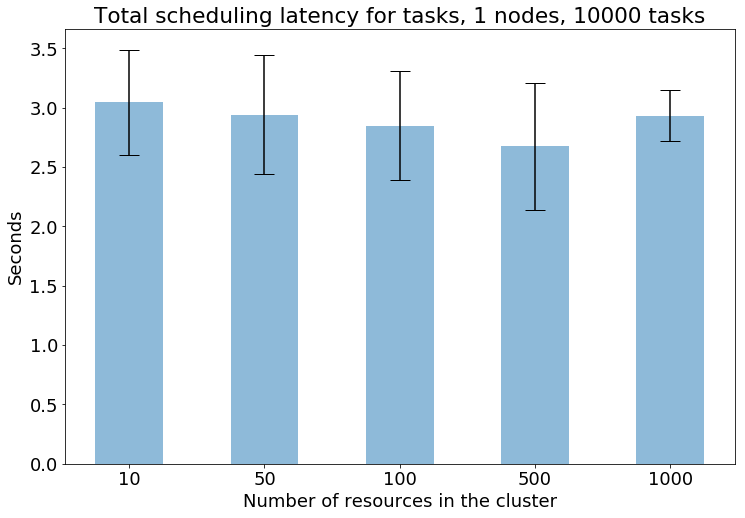

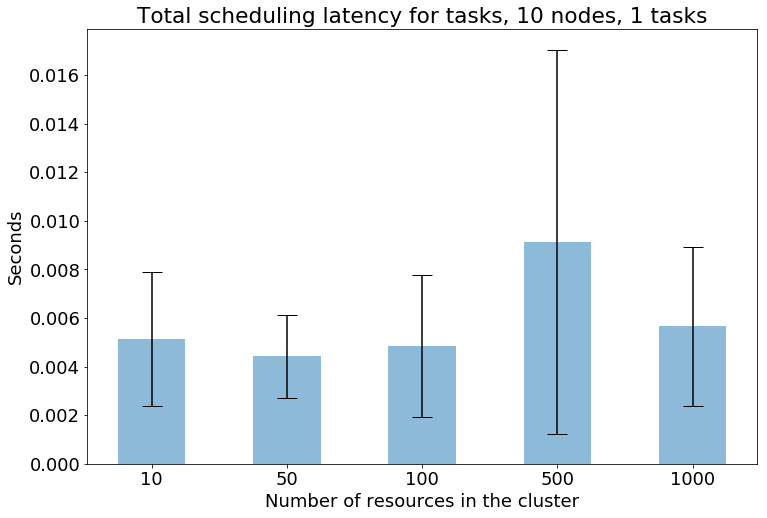

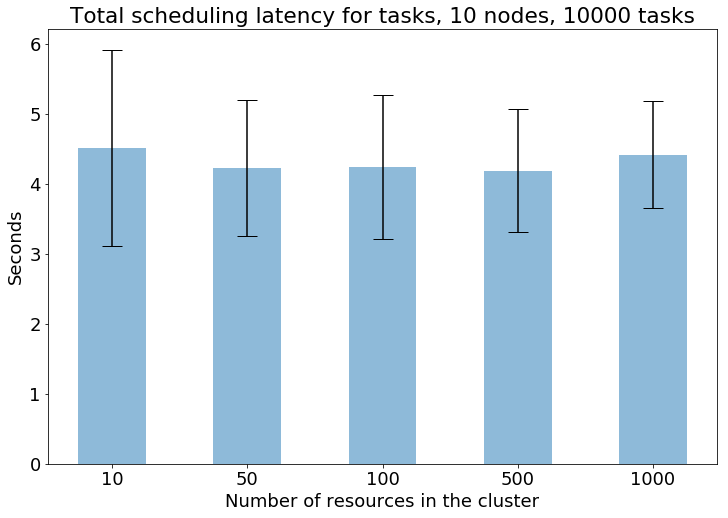

In [74]:
num_nodes = 1

for num_nodes in num_node_range:
    for num_task in num_task_range:
        plt.figure()
        plot_schedlatency_bars(mean_data, stddev_data, num_res_range, num_nodes, num_task=num_task)
        #plt.ylim([0,0.015])
    

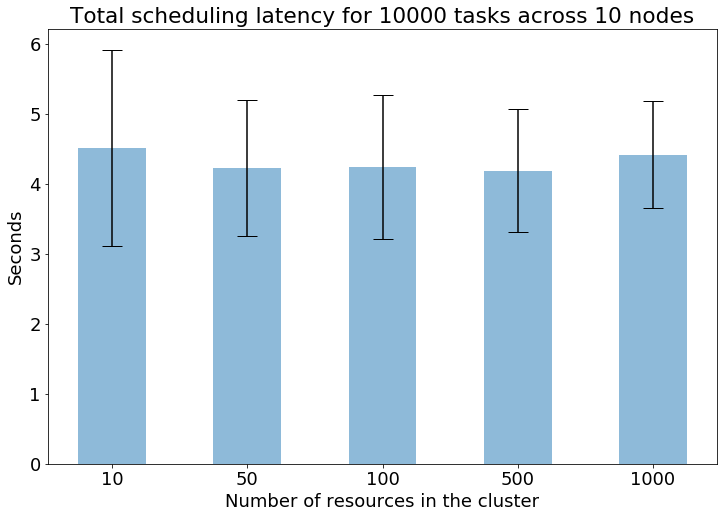

In [81]:
plot_schedlatency_bars(mean_data, stddev_data, num_res_range, 10, num_task=10000)
plt.savefig("../eval/final_plots/result_microbench_schedlatency_vs_clusterresources.pdf")